In [0]:
import tensorflow as tf
import numpy as np
import collections
from matplotlib import pyplot as plt
%matplotlib inline

# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [0]:
def get_label_names(idx):
    labels = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    return labels[idx]

In [0]:
def find_wrong(x_test, y_test, model_path):
    model = tf.keras.models.load_model(model_path)

    preds = model.predict(x_test)
    return np.argmax(preds, axis=1)

In [4]:
(_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test / 255

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
preds_arg = find_wrong(x_test, y_test, 'mnist_fashion_aug_fc_0.h5')

not_equals = (preds_arg != y_test)

from_preds = preds_arg[not_equals]
from_tests = y_test[not_equals]

print(from_preds[:10])
print(from_tests[:10])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[6 1 6 7 2 2 6 7 6 6]
[4 3 3 9 6 4 2 9 2 0]


In [6]:
c = collections.Counter(from_tests)
print(c)

Counter({6: 191, 0: 110, 2: 95, 4: 76, 3: 59, 9: 32, 1: 14, 5: 14, 7: 14, 8: 13})


빈도순 출력을 보면, 신발/가방 등의 액세서리에서는 잘 맞지만<br/>
같은 계열인 옷 종류에서 구별하지 못함을 알 수 있다.<br/>
['Shirt' 'T-shirt/top' 'Pullover' 'Coat' 'Dress' 'Ankle boot' 'Trouser' 'Sandal' 'Sneaker' 'Bag']

In [8]:
# 앞에서 나온 순서가 정확한지 검증
c = collections.Counter({6: 191, 0: 110, 2: 95, 4: 76, 3: 59, 9: 32, 1: 14, 5: 14, 7: 14, 8: 13})
print(c)
print(c.keys())

labels = get_label_names(list(c.keys()))
print(labels)

Counter({6: 191, 0: 110, 2: 95, 4: 76, 3: 59, 9: 32, 1: 14, 5: 14, 7: 14, 8: 13})
dict_keys([6, 0, 2, 4, 3, 9, 1, 5, 7, 8])
['Shirt' 'T-shirt/top' 'Pullover' 'Coat' 'Dress' 'Ankle boot' 'Trouser'
 'Sandal' 'Sneaker' 'Bag']


In [0]:
n_models = 10
binds_preds = np.zeros([n_models+1, 10000], dtype=np.int32)
for i in range(n_models):
    preds_arg = find_wrong(x_test, y_test, 'mnist_fashion_aug_fc_{}.h5'.format(i))
    binds_preds[i] = preds_arg

binds_preds[-1] = y_test
binds_preds_t = binds_preds.T

In [14]:
# 모든 모델에서 잘못 예측한 데이터 찾기 (정답을 예측한 모델이 하나도 없는 경우)
perfect_wrong = []
for i in range(len(y_test)):
    # 예측 결과에 정답이 들어있는지 검사
    if y_test[i] not in binds_preds_t[i]:
        perfect_wrong.append(i)
        print('{:3} : {}  {}'.format(i, y_test[i], binds_preds_t[i]))
print('-' * 50)
print(perfect_wrong)

--------------------------------------------------
[]


모델 전체에서 정답을 1개라도 예측하지 못한 경우는 없음

In [16]:
# 정답을 맞추지 못한 모델이 1개라도 존재하는 데이터 찾기 
for i in range(len(y_test)):
    uniques = np.unique(binds_preds_t[i])

    # i번째 데이터를 예측한 결과가 모두 같다면 1개의 숫자만 존재
    if len(uniques) != 1:
        print('{:3} : {}  {}'.format(i, y_test[i], binds_preds_t[i]))

 17 : 4  [4 4 6 6 4 6 4 6 6 6 4]
 23 : 9  [9 5 5 5 5 5 5 5 5 5 9]
 25 : 4  [6 2 2 6 6 6 6 6 6 4 4]
 32 : 3  [1 3 3 1 3 1 3 3 1 3 3]
 40 : 6  [6 6 6 6 6 6 6 6 0 0 6]
 42 : 3  [6 6 6 6 6 0 0 6 0 6 3]
 48 : 2  [2 2 6 2 2 2 2 2 2 2 2]
 49 : 2  [2 2 6 6 6 6 6 2 6 2 2]
 51 : 4  [4 4 4 4 6 4 4 4 4 4 4]
 67 : 3  [3 4 4 4 3 4 4 4 4 4 3]
 68 : 9  [7 7 7 7 7 7 7 7 7 7 9]
 89 : 6  [2 2 6 2 2 6 6 2 2 2 6]
 98 : 4  [2 2 4 2 2 2 4 2 2 4 4]
103 : 2  [6 2 6 6 2 2 2 6 2 2 2]
107 : 9  [7 9 7 9 9 9 9 9 9 7 9]
117 : 6  [6 6 6 6 6 4 6 6 4 6 6]
135 : 6  [6 6 6 6 6 6 6 6 6 4 6]
136 : 2  [6 2 6 2 6 2 2 2 6 2 2]
141 : 0  [6 0 0 6 6 0 6 0 0 0 0]
147 : 6  [3 3 3 3 3 3 3 3 3 3 6]
150 : 4  [3 3 3 3 3 3 3 3 3 3 4]
151 : 4  [6 4 4 6 4 6 4 8 4 4 4]
153 : 4  [4 3 4 4 3 3 3 3 3 3 4]
155 : 0  [0 0 2 0 0 0 0 0 0 0 0]
162 : 3  [3 3 3 3 3 3 3 3 0 3 3]
192 : 1  [1 3 1 1 1 3 3 3 3 3 1]
241 : 6  [4 4 4 4 4 6 4 6 4 6 6]
244 : 6  [2 2 2 2 2 2 2 2 2 2 6]
250 : 9  [9 9 9 9 9 7 9 9 9 9 9]
266 : 3  [4 4 3 3 3 3 3 4 4 3 3]
271 : 3  [

In [23]:
# 예측 결과만으로 앙상블 구성
binds = np.zeros(len(y_test), dtype=np.int32)
for i, item in enumerate(binds_preds_t):
    c = collections.Counter(item)
    binds[i] = list(c.keys())[0]
    
print('binds :', np.mean(binds == y_test))

binds : 0.9382


출력 결과를 보고<br />
정답을 예측하는 모델이 많다고 생각이 들어서<br />
단순히 전체 모델이 가장 많이 예측한 값을 평가하면 어떨까,하는 생각이 들었는데<br />
이게 너무 좋은 결과가 나왔다.

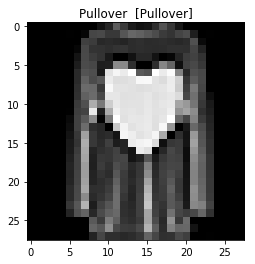

In [25]:
def show_image(image_data, answer, predict):
    plt.imshow(image_data, cmap='gray')
    
    title = '{}  [{}]'.format(get_label_names(answer), get_label_names(predict))
    plt.title(title)
    plt.show()

# x_test를 변환했기 때문에 다시 로드해야 한다.
(_, _), (xx, yy) = tf.keras.datasets.fashion_mnist.load_data()
    
idx = 9985
show_image(xx[idx], yy[idx], binds[idx])